In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
from PIL.Image import open as open_wordcloud
pd.set_option('display.max_columns',100)
cf.go_offline()

In [92]:
data=pd.read_csv('../data/Datafiniti_Hotel_Reviews_Jun19.csv')

In [93]:
data

id             dateAdded           dateUpdated  \
0     AWE2FvX5RxPSIh2RscTK  2018-01-18T18:43:12Z  2019-05-20T23:55:47Z   
1     AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
2     AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
3     AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
4     AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
...                    ...                   ...                   ...   
9995  AVwdatg0ByjofQCxo5S5  2017-04-14T05:04:33Z  2018-12-02T13:36:35Z   
9996  AVwdatg0ByjofQCxo5S5  2017-04-14T05:04:33Z  2018-12-02T13:36:35Z   
9997  AVwdatg0ByjofQCxo5S5  2017-04-14T05:04:33Z  2018-12-02T13:36:35Z   
9998  AV1thTgM3-Khe5l_OvT5  2017-07-23T03:37:13Z  2018-12-02T00:27:00Z   
9999  AV1tg9C7a4HuVbed8XA5  2017-07-23T03:35:41Z  2018-12-01T21:24:24Z   

                             address  \
0                    5620 Calle Real   
1     5th And San Carlos PO Box 3574   
2     5th And San Carlos PO Box 3574   
3     5th And San Carlos PO Box 3574   
4     5th And San Carlos PO Box 3574   
...                              ...   
9995                3101 Coliseum Dr   
9996                3101 Coliseum Dr   
9997                3101 Coliseum Dr   
9998                7886 Main Street   
9999                  3505 S Main St   

                                             categories  \
0     Hotels,Hotels and motels,Hotel and motel mgmt....   
1                                  Hotels,Lodging,Hotel   
2                                  Hotels,Lodging,Hotel   
3                                  Hotels,Lodging,Hotel   
4                                  Hotels,Lodging,Hotel   
...                                                 ...   
9995  Hotels,Hotels and motels,Corporate Lodging,New...   
9996  Hotels,Hotels and motels,Corporate Lodging,New...   
9997  Hotels,Hotels and motels,Corporate Lodging,New...   
9998                       Hotels,Bar,Hotel,Restaurants   
9999  Hotels,Hotels and motels,Corporate Lodging,Lod...   

                  primaryCategories               city country  \
0     Accommodation & Food Services             Goleta      US   
1     Accommodation & Food Services  Carmel by the Sea      US   
2     Accommodation & Food Services  Carmel by the Sea      US   
3     Accommodation & Food Services  Carmel by the Sea      US   
4     Accommodation & Food Services  Carmel by the Sea      US   
...                             ...                ...     ...   
9995  Accommodation & Food Services            Hampton      US   
9996  Accommodation & Food Services            Hampton      US   
9997  Accommodation & Food Services            Hampton      US   
9998  Accommodation & Food Services             Hunter      US   
9999  Accommodation & Food Services            Lindale      US   

                                                   keys   latitude  \
0                us/ca/goleta/5620callereal/-1127060008  34.441780   
1     us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.557220   
2     us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.557220   
3     us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.557220   
4     us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.557220   
...                                                 ...        ...   
9995           us/va/hampton/3101coliseumdr/-1319580369  37.057650   
9996           us/va/hampton/3101coliseumdr/-1319580369  37.057650   
9997           us/va/hampton/3101coliseumdr/-1319580369  37.057650   
9998             us/ny/hunter/7886mainstreet/-435384771  42.210915   
9999               us/tx/lindale/3505smainst/-147603681  32.469540   

       longitude                                    name postalCode province  \
0    -119.819790       Best Western Plus South Coast Inn      93117       CA   
1    -121.921940  Best Western Carmel's Town House Lodge      93921       CA   
2    -121.921940  Best Western Carmel's Town House Lodge      93921    

In [94]:
data.shape

(10000, 26)

In [95]:
data.head()


id             dateAdded           dateUpdated  \
0  AWE2FvX5RxPSIh2RscTK  2018-01-18T18:43:12Z  2019-05-20T23:55:47Z   
1  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
2  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
3  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
4  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   

                          address  \
0                 5620 Calle Real   
1  5th And San Carlos PO Box 3574   
2  5th And San Carlos PO Box 3574   
3  5th And San Carlos PO Box 3574   
4  5th And San Carlos PO Box 3574   

                                          categories  \
0  Hotels,Hotels and motels,Hotel and motel mgmt....   
1                               Hotels,Lodging,Hotel   
2                               Hotels,Lodging,Hotel   
3                               Hotels,Lodging,Hotel   
4                               Hotels,Lodging,Hotel   

               primaryCategories               city country  \
0  Accommodation & Food Services             Goleta      US   
1  Accommodation & Food Services  Carmel by the Sea      US   
2  Accommodation & Food Services  Carmel by the Sea      US   
3  Accommodation & Food Services  Carmel by the Sea      US   
4  Accommodation & Food Services  Carmel by the Sea      US   

                                                keys  latitude  longitude  \
0             us/ca/goleta/5620callereal/-1127060008  34.44178 -119.81979   
1  us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.55722 -121.92194   
2  us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.55722 -121.92194   
3  us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.55722 -121.92194   
4  us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.55722 -121.92194   

                                     name postalCode province  \
0       Best Western Plus South Coast Inn      93117       CA   
1  Best Western Carmel's Town House Lodge      93921       CA   
2  Best Western Carmel's Town House Lodge      93921       CA   
3  Best Western Carmel's Town House Lodge      93921       CA   
4  Best Western Carmel's Town House Lodge      93921       CA   

               reviews.date  reviews.dateAdded  \
0  2018-01-01T00:00:00.000Z                NaN   
1      2016-04-02T00:00:00Z                NaN   
2      2016-01-06T00:00:00Z                NaN   
3      2016-08-22T00:00:00Z                NaN   
4      2016-03-21T00:00:00Z                NaN   

                            reviews.dateSeen  reviews.rating  \
0                       2018-01-03T00:00:00Z               3   
1                       2016-10-09T00:00:00Z               4   
2                       2016-10-09T00:00:00Z               3   
3                       2016-10-31T00:00:00Z               5   
4  2016-10-09T00:00:00Z,2016-03-27T00:00:00Z               2   

                                  reviews.sourceURLs  \
0  https://www.tripadvisor.com/Hotel_Review-g3243...   
1  https://www.tripadvisor.com/Hotel_Review-g3217...   
2  https://www.tripadvisor.com/Hotel_Review-g3217...   
3  https://www.tripadvisor.com/Hotel_Review-g3217...   
4  https://www.tripadvisor.com/Hotel_Review-g3217...   

                                        reviews.text  \
0  This hotel was nice and quiet. Did not know, t...   
1  We stayed in the king suite with the separatio...   
2  Parking was horrible, somebody ran into my ren...   
3  Not cheap but excellent location. Price is som...   
4  If you get the room that they advertised on th...   

                                       reviews.title reviews.userCity  \
0                            Best Western Plus Hotel         San Jose   
1  Clean rooms at solid rates in the heart of Carmel    San Francisco   
2                                           Business  Prescott Valley   
3                                          Very good         Guaynabo   
4                       Low chance to come back here             Reno   

  

In [96]:
data.describe()


latitude     longitude  reviews.dateAdded  reviews.rating
count  10000.000000  10000.000000                0.0    10000.000000
mean      35.048897   -101.619599                NaN        4.084100
std        6.390993     20.158379                NaN        1.152371
min       19.438604   -159.480300                NaN        1.000000
25%       29.957700   -117.888954                NaN        4.000000
50%       33.804844    -95.997600                NaN        4.000000
75%       39.048210    -84.371578                NaN        5.000000
max       64.843590    -71.073340                NaN        5.000000

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateAdded   

In [97]:
data['reviews.dateAdded'].value_counts()


Series([], Name: reviews.dateAdded, dtype: int64)

In [98]:
data['dateAdded']

0       2018-01-18T18:43:12Z
1       2016-11-06T20:21:05Z
2       2016-11-06T20:21:05Z
3       2016-11-06T20:21:05Z
4       2016-11-06T20:21:05Z
                ...         
9995    2017-04-14T05:04:33Z
9996    2017-04-14T05:04:33Z
9997    2017-04-14T05:04:33Z
9998    2017-07-23T03:37:13Z
9999    2017-07-23T03:35:41Z
Name: dateAdded, Length: 10000, dtype: object

In [10]:
type(data['dateAdded'][0])


str

In [99]:
data['dateAdded']=pd.to_datetime(data['dateAdded'])

In [100]:
data['dateUpdated']=pd.to_datetime(data['dateUpdated'])

In [101]:
data['categories'].value_counts()

Hotels Motels,Hotel                                                                                                          1554
Hotels and motels,Hotel                                                                                                       565
Hotels,Lodging,Hotel                                                                                                          549
Hotels,Corporate Lodging,Lodging,Hotel                                                                                        443
Hotels and motels,Hotel and motel reservations,Hotel                                                                          434
                                                                                                                             ... 
Hotels and motels,Resorts,Lodging,Hotels Motels,Hotel                                                                           1
Hotels,Hotels and motels,Hotel and motel mgmt.,Lodging,Motels,Hotel                       

In [102]:
data['categories'].value_counts().head().iplot(kind='bar',color='blue')

In [103]:
dict_replace={'Hotels and motels,Hotel':'Hotels Motels,Hotel'}

In [104]:
data['categories']=data['categories'].replace(dict_replace)

In [105]:
data['dateAdded'].min(), data['dateAdded'].max()

(Timestamp('2014-10-24 13:52:43+0000', tz='UTC'),
 Timestamp('2018-12-28 06:33:31+0000', tz='UTC'))

In [106]:
data['year']=data['dateAdded'].dt.year

In [107]:
data.head()

id                 dateAdded               dateUpdated  \
0  AWE2FvX5RxPSIh2RscTK 2018-01-18 18:43:12+00:00 2019-05-20 23:55:47+00:00   
1  AVwcj_OhkufWRAb5wi9T 2016-11-06 20:21:05+00:00 2019-05-20 23:31:56+00:00   
2  AVwcj_OhkufWRAb5wi9T 2016-11-06 20:21:05+00:00 2019-05-20 23:31:56+00:00   
3  AVwcj_OhkufWRAb5wi9T 2016-11-06 20:21:05+00:00 2019-05-20 23:31:56+00:00   
4  AVwcj_OhkufWRAb5wi9T 2016-11-06 20:21:05+00:00 2019-05-20 23:31:56+00:00   

                          address  \
0                 5620 Calle Real   
1  5th And San Carlos PO Box 3574   
2  5th And San Carlos PO Box 3574   
3  5th And San Carlos PO Box 3574   
4  5th And San Carlos PO Box 3574   

                                          categories  \
0  Hotels,Hotels and motels,Hotel and motel mgmt....   
1                               Hotels,Lodging,Hotel   
2                               Hotels,Lodging,Hotel   
3                               Hotels,Lodging,Hotel   
4                               Hotels,Lodging,Hotel   

               primaryCategories               city country  \
0  Accommodation & Food Services             Goleta      US   
1  Accommodation & Food Services  Carmel by the Sea      US   
2  Accommodation & Food Services  Carmel by the Sea      US   
3  Accommodation & Food Services  Carmel by the Sea      US   
4  Accommodation & Food Services  Carmel by the Sea      US   

                                                keys  latitude  longitude  \
0             us/ca/goleta/5620callereal/-1127060008  34.44178 -119.81979   
1  us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.55722 -121.92194   
2  us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.55722 -121.92194   
3  us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.55722 -121.92194   
4  us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.55722 -121.92194   

                                     name postalCode province  \
0       Best Western Plus South Coast Inn      93117       CA   
1  Best Western Carmel's Town House Lodge      93921       CA   
2  Best Western Carmel's Town House Lodge      93921       CA   
3  Best Western Carmel's Town House Lodge      93921       CA   
4  Best Western Carmel's Town House Lodge      93921       CA   

               reviews.date  reviews.dateAdded  \
0  2018-01-01T00:00:00.000Z                NaN   
1      2016-04-02T00:00:00Z                NaN   
2      2016-01-06T00:00:00Z                NaN   
3      2016-08-22T00:00:00Z                NaN   
4      2016-03-21T00:00:00Z                NaN   

                            reviews.dateSeen  reviews.rating  \
0                       2018-01-03T00:00:00Z               3   
1                       2016-10-09T00:00:00Z               4   
2                       2016-10-09T00:00:00Z               3   
3                       2016-10-31T00:00:00Z               5   
4  2016-10-09T00:00:00Z,2016-03-27T00:00:00Z               2   

                                  reviews.sourceURLs  \
0  https://www.tripadvisor.com/Hotel_Review-g3243...   
1  https://www.tripadvisor.com/Hotel_Review-g3217...   
2  https://www.tripadvisor.com/Hotel_Review-g3217...   
3  https://www.tripadvisor.com/Hotel_Review-g3217...   
4  https://www.tripadvisor.com/Hotel_Review-g3217...   

                                        reviews.text  \
0  This hotel was nice and quiet. Did not know, t...   
1  We stayed in the king suite with the separatio...   
2  Parking was horrible, somebody ran into my ren...   
3  Not cheap but excellent location. Price is som...   
4  If you get the room that they advertised on th...   

                                       reviews.title reviews.userCity  \
0                            Best Western Plus Hotel         San Jose   
1  Clean rooms at solid rates in the heart of Carmel    San Francisco   
2                                           Business  Prescott Valley   
3                                          Very good         Guaynabo   
4                       Low 

In [108]:
data.groupby('year')[['reviews.rating']].mean()

reviews.rating
year                
2014        4.285714
2015        4.027638
2016        3.988424
2017        4.170068
2018        4.076694

In [109]:
data.country.value_counts() # variable unaria

US    10000
Name: country, dtype: int64

In [110]:
data.city.value_counts(dropna=False,normalize=1)

San Diego          0.1189
San Francisco      0.0808
New Orleans        0.0798
Atlanta            0.0762
Orlando            0.0734
                    ...  
Pasco              0.0001
Merrillville       0.0001
Dalton             0.0001
Kimberling City    0.0001
Lindale            0.0001
Name: city, Length: 842, dtype: float64

In [111]:
data['reviews.text']

0       This hotel was nice and quiet. Did not know, t...
1       We stayed in the king suite with the separatio...
2       Parking was horrible, somebody ran into my ren...
3       Not cheap but excellent location. Price is som...
4       If you get the room that they advertised on th...
                              ...                        
9995    My friends and I took a trip to Hampton for th...
9996    from check in to departure, staff is friendly,...
9997    This Hampton is located on a quiet street acro...
9998    Awesome wings (my favorite was garlic parmesan...
9999    Clean facility just off freeway ..... staff fr...
Name: reviews.text, Length: 10000, dtype: object

In [24]:
## Wordclouds

In [25]:
#### install wordcloud

In [112]:
import re, unicodedata
##quita acentos,vuelve todo a minúsculas y se quitan signos 
def clean_words(text):
    res =  unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    res = re.sub("[^a-zA-Z0-9 ]"," ", res.decode("utf-8"), flags=re.UNICODE)
    res =  u' '.join(res.lower().split())
    return res
    

In [113]:
data['reviews_clean']=data['reviews.text'].map(clean_words)

In [114]:
data['reviews_clean']

0       this hotel was nice and quiet did not know the...
1       we stayed in the king suite with the separatio...
2       parking was horrible somebody ran into my rent...
3       not cheap but excellent location price is some...
4       if you get the room that they advertised on th...
                              ...                        
9995    my friends and i took a trip to hampton for th...
9996    from check in to departure staff is friendly p...
9997    this hampton is located on a quiet street acro...
9998    awesome wings my favorite was garlic parmesan ...
9999    clean facility just off freeway staff friendly...
Name: reviews_clean, Length: 10000, dtype: object

In [115]:
texto=' '.join(data['reviews_clean'].to_list())

In [116]:
texto

'this hotel was nice and quiet did not know there was train track near by but it was only few train passed during our stay best western changed hotel classification the plus category are not the same as before we stayed in the king suite with the separation between the bedroom and the living space the sofa bed wasn t very good i had back discomfort by the day we left on our three night stay the room is clean and the king bed very comfortable this hotel is located within walking distance to most places you will want to more parking was horrible somebody ran into my rental car while staying there i didn t get to try the breakfast i was there for business so the restaurant opened to late for the business world to enjoy i had to asked for coffee for my room and the items in the vending machine were stale not cheap but excellent location price is somewhat standard for not hacing reservations but room was nice and clean they offer good continental breakfast which is a plus and compensates fr

In [117]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

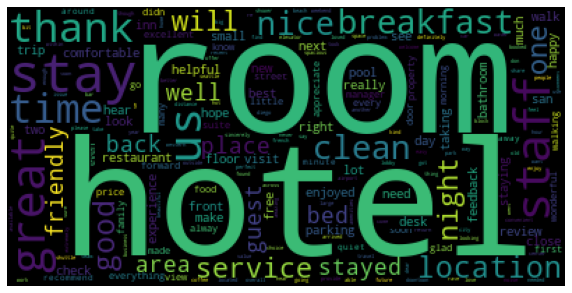

In [118]:
wc = WordCloud(collocations=False)
wc.generate_from_text(texto)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [119]:
from nltk.corpus import stopwords

In [34]:
## Stopwords:

##Estas palabras no tienen un significado por si solas, sino que modifican o acompañan a otras, este grupo suele estar conformado por artículos, pronombres, preposiciones, adverbios

In [120]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [121]:
stopwords=stopwords.words('english')

In [122]:
vocab=[x for x in texto.split() if x not in stopwords]

In [123]:
vocab

['hotel',
 'nice',
 'quiet',
 'know',
 'train',
 'track',
 'near',
 'train',
 'passed',
 'stay',
 'best',
 'western',
 'changed',
 'hotel',
 'classification',
 'plus',
 'category',
 'stayed',
 'king',
 'suite',
 'separation',
 'bedroom',
 'living',
 'space',
 'sofa',
 'bed',
 'good',
 'back',
 'discomfort',
 'day',
 'left',
 'three',
 'night',
 'stay',
 'room',
 'clean',
 'king',
 'bed',
 'comfortable',
 'hotel',
 'located',
 'within',
 'walking',
 'distance',
 'places',
 'want',
 'parking',
 'horrible',
 'somebody',
 'ran',
 'rental',
 'car',
 'staying',
 'get',
 'try',
 'breakfast',
 'business',
 'restaurant',
 'opened',
 'late',
 'business',
 'world',
 'enjoy',
 'asked',
 'coffee',
 'room',
 'items',
 'vending',
 'machine',
 'stale',
 'cheap',
 'excellent',
 'location',
 'price',
 'somewhat',
 'standard',
 'hacing',
 'reservations',
 'room',
 'nice',
 'clean',
 'offer',
 'good',
 'continental',
 'breakfast',
 'plus',
 'compensates',
 'front',
 'desk',
 'service',
 'personnel',
 'exc

In [124]:
import nltk

In [40]:
## Hapaxes

###Palabras que solo aparecen una vez en el texto.

In [125]:
freq=nltk.FreqDist(vocab)

In [126]:
freq

FreqDist({'hotel': 12370, 'room': 10282, 'stay': 7890, 'staff': 6250, 'great': 5909, 'us': 5638, 'clean': 4222, 'breakfast': 4174, 'thank': 3961, 'nice': 3919, ...})

In [127]:
freq.hapaxes()

['classification',
 'hacing',
 'compensates',
 'rimmed',
 'lockbox',
 'adventurous',
 'buffs',
 'plague',
 'misnomer',
 'courtis',
 'aptly',
 'underlining',
 'licensed',
 'russells',
 'declining',
 'locationgood',
 'shameth',
 'goodwe',
 'recommanded',
 'platesdear',
 'informational',
 'repudiable',
 'buckling',
 'tripped',
 'undergo',
 'hodgepodge',
 'mercury',
 'josephcarter2018',
 'ogden',
 'coincided',
 'subsided',
 'mammoth',
 '36hrs',
 '2800',
 'anbot',
 '2200',
 '3ft',
 'hampered',
 'bamk',
 '3minute',
 'disability',
 'monetary',
 'disconnect',
 'narrowed',
 'ngts',
 'reopen',
 '90th',
 '1959',
 'thomasnashville',
 'tnwe',
 'managerccallaiswyndham',
 'pooronly',
 '8686',
 'enteraction',
 'daviswhitneyhotel',
 '581',
 '4222',
 'labicheguest',
 'teller',
 'ubered',
 'res877',
 'motivation',
 'spontaneous',
 'antlers',
 'ors',
 'af',
 'feast',
 'liquids',
 'acquaintance',
 'spiral',
 'ima',
 'harassing',
 'racist',
 'lp',
 '23th',
 'meticulous',
 'otis',
 'slapped',
 '860',
 '9384'

In [128]:
list(set(vocab)-set(freq.hapaxes()))

['cockroaches',
 'unlike',
 'jj',
 'approximately',
 'vacationer',
 'christian',
 'introduce',
 'wins',
 'routinely',
 'somehow',
 'press',
 'travellers',
 'nail',
 'alain',
 'shape',
 'sergio',
 'toasters',
 'heigl',
 'wadi',
 'actual',
 'tie',
 'flowers',
 'par',
 'firstly',
 'hopes',
 'reluctant',
 'dean',
 'veterans',
 'events',
 'consistency',
 'supper',
 'exception',
 'royal',
 'hotwire',
 'neighborhoods',
 'arrived',
 'swear',
 'tourists',
 'thanks',
 'humble',
 'tiled',
 'rusty',
 'refreshments',
 'eve',
 'toilets',
 'strings',
 'meaning',
 'hmmm',
 'ch',
 'power',
 'docking',
 'apart',
 'faint',
 'everywhere',
 'funeral',
 'arrivals',
 'creole',
 'pthank',
 'buildingbut',
 'baez',
 'moving',
 'airfare',
 'thing',
 'window',
 'hears',
 'islands',
 'maine',
 'deterrent',
 'managercomfort',
 'smith',
 'sneak',
 'jamaica',
 'shame',
 'jets',
 'tiles',
 'resorts',
 'winners',
 'brandtguest',
 'atrocious',
 'louder',
 'hoping',
 'birds',
 'number',
 'basic',
 'deemed',
 'discard',
 

In [129]:
text_clean=' '.join(list(set(vocab)-set(freq.hapaxes())))

In [130]:
text_clean

'cockroaches unlike jj approximately vacationer christian introduce wins routinely somehow press travellers nail alain shape sergio toasters heigl wadi actual tie flowers par firstly hopes reluctant dean veterans events consistency supper exception royal hotwire neighborhoods arrived swear tourists thanks humble tiled rusty refreshments eve toilets strings meaning hmmm ch power docking apart faint everywhere funeral arrivals creole pthank buildingbut baez moving airfare thing window hears islands maine deterrent managercomfort smith sneak jamaica shame jets tiles resorts winners brandtguest atrocious louder hoping birds number basic deemed discard 20mins rajan hospitality hinges bday rejected br tom irish beckeragm endure guitar roll managerquality soaking many rory stationary tend deeper discovered participating stink muni smack functioning happening wc procseed lit brickton disruptions mansion olivers hearts decided suitcase heat brianna pubes certified good posh nuts commerce downs 

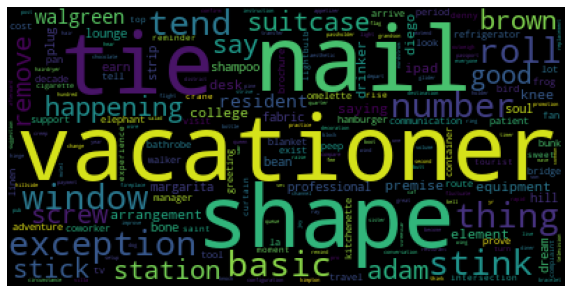

In [131]:
wc.generate_from_text(text_clean)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [132]:
import stylecloud

In [ ]:
##https://fontawesome.com/icons/

<i class="fab fa-jedi-order"></i>

<i class="fas fa-hotel"></i>
<i class="fas fa-concierge-bell"></i>

In [ ]:
<i class="fa-solid fa-bell-concierge"></i>

In [49]:
stylecloud.gen_stylecloud(text=text_clean,
                          collocations=False,
                          icon_name='fas fa-concierge-bell',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='white',
                          gradient='horizontal',
                         output_name='hotel.png')

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/stylecloud/stylecloud.py:135: MatplotlibDeprecationWarning:


The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.



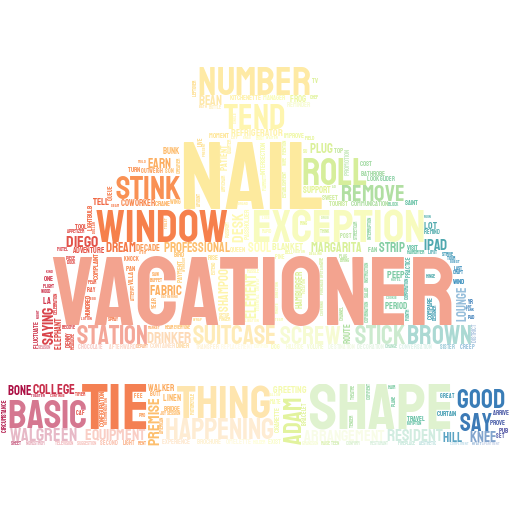

In [50]:
open_wordcloud('hotel.png')

In [133]:
data[data['reviews.rating']<=2]

id                 dateAdded  \
4     AVwcj_OhkufWRAb5wi9T 2016-11-06 20:21:05+00:00   
6     AVweLARAByjofQCxv5vX 2016-05-16 22:39:30+00:00   
7     AV1thAoL3-Khe5l_Ott5 2017-07-23 03:35:56+00:00   
9     AVwdo6WHByjofQCxrGaj 2016-11-02 17:23:39+00:00   
15    AWV8VsCtRxPSIh2RyTvS 2018-08-27 17:01:16+00:00   
...                    ...                       ...   
9954  AV1Ts5IFLD2H7whiaPiu 2017-07-18 03:17:43+00:00   
9959  AV1Ts5IFLD2H7whiaPiu 2017-07-18 03:17:43+00:00   
9960  AV1Ts5IFLD2H7whiaPiu 2017-07-18 03:17:43+00:00   
9975  AV1Ts5IFLD2H7whiaPiu 2017-07-18 03:17:43+00:00   
9979  AWE8MwFl3-Khe5l_gKez 2018-01-28 09:50:38+00:00   

                   dateUpdated                         address  \
4    2019-05-20 23:31:56+00:00  5th And San Carlos PO Box 3574   
6    2019-05-20 23:28:44+00:00                   167 W Main St   
7    2019-05-20 23:28:32+00:00          115 W Steve Wariner Dr   
9    2019-05-20 23:26:47+00:00                  1107 N Main St   
15   2019-05-20 21:40:08+00:00                  610 Poydras St   
...                        ...                             ...   
9954 2018-12-04 15:05:29+00:00       11428 Marbella Palm Court   
9959 2018-12-04 15:05:29+00:00       11428 Marbella Palm Court   
9960 2018-12-04 15:05:29+00:00       11428 Marbella Palm Court   
9975 2018-12-04 15:05:29+00:00       11428 Marbella Palm Court   
9979 2018-12-04 15:01:17+00:00                   426 W Ball Rd   

                                             categories  \
4                                  Hotels,Lodging,Hotel   
6            Hotels,Hotels and motels,Hotel,Restaurants   
7                                   Hotels Motels,Hotel   
9     Hotels,Bed Breakfasts,Bed & Breakfasts,Hotels ...   
15                     Building,Hotels and motels,Hotel   
...                                                 ...   
9954                                Hotels Motels,Hotel   
9959                                Hotels Motels,Hotel   
9960                                Hotels Motels,Hotel   
9975                                Hotels Motels,Hotel   
9979  Hotels,Hotels and motels,Hotel and motel reser...   

                  primaryCategories               city country  \
4     Accommodation & Food Services  Carmel by the Sea      US   
6     Accommodation & Food Services          Lexington      US   
7     Accommodation & Food Services    Russell Springs      US   
9     Accommodation & Food Services       Hopkinsville      US   
15    Accommodation & Food Services        New Orleans      US   
...                             ...                ...     ...   
9954  Accommodation & Food Services            Orlando      US   
9959  Accommodation & Food Services            Orlando      US   
9960  Accommodation & Food Services            Orlando      US   
9975  Accommodation & Food Services            Orlando      US   
9979  Accommodation & Food Services            Anaheim      US   

                                                   keys   latitude  \
4     us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.557220   
6                us/ky/lexington/167wmainst/-1165617038  38.047014   
7     us/ky/russellsprings/115wstevewarinerdr/-41169...  37.065296   
9            us/ky/hopkinsville/1107nmainst/-1877262391  36.889000   
15             us/la/neworleans/610poydrasst/-946012914  29.949125   
...                                                 ...        ...   
9954    us/fl/orlando/11428marbellapalmcourt/-676701852  28.392866   
9959    us/fl/orlando/11428marbellapalmcourt/-676701852  28.392866   
9960    us/fl/orlando/11428marbellapalmcourt/-676701852  28.392866   
9975    us/fl/orlando/11428marbellapalmcourt/-676701852  28.392866   
9979                us/ca/anaheim/426wballrd/-942044657  33.817650   

       longitude                                               name  \
4    -121.921940             Best Western Carmel's Town House Lodge   
6     -84.497742                         21c Museum Hotel Lexington   
7 

In [52]:
data['tgt']=data['reviews.rating'].map(lambda x: 1 if x>=3 else 0)

In [53]:
data[data['tgt']==0]

id                 dateAdded  \
4     AVwcj_OhkufWRAb5wi9T 2016-11-06 20:21:05+00:00   
6     AVweLARAByjofQCxv5vX 2016-05-16 22:39:30+00:00   
7     AV1thAoL3-Khe5l_Ott5 2017-07-23 03:35:56+00:00   
9     AVwdo6WHByjofQCxrGaj 2016-11-02 17:23:39+00:00   
15    AWV8VsCtRxPSIh2RyTvS 2018-08-27 17:01:16+00:00   
...                    ...                       ...   
9954  AV1Ts5IFLD2H7whiaPiu 2017-07-18 03:17:43+00:00   
9959  AV1Ts5IFLD2H7whiaPiu 2017-07-18 03:17:43+00:00   
9960  AV1Ts5IFLD2H7whiaPiu 2017-07-18 03:17:43+00:00   
9975  AV1Ts5IFLD2H7whiaPiu 2017-07-18 03:17:43+00:00   
9979  AWE8MwFl3-Khe5l_gKez 2018-01-28 09:50:38+00:00   

                   dateUpdated                         address  \
4    2019-05-20 23:31:56+00:00  5th And San Carlos PO Box 3574   
6    2019-05-20 23:28:44+00:00                   167 W Main St   
7    2019-05-20 23:28:32+00:00          115 W Steve Wariner Dr   
9    2019-05-20 23:26:47+00:00                  1107 N Main St   
15   2019-05-20 21:40:08+00:00                  610 Poydras St   
...                        ...                             ...   
9954 2018-12-04 15:05:29+00:00       11428 Marbella Palm Court   
9959 2018-12-04 15:05:29+00:00       11428 Marbella Palm Court   
9960 2018-12-04 15:05:29+00:00       11428 Marbella Palm Court   
9975 2018-12-04 15:05:29+00:00       11428 Marbella Palm Court   
9979 2018-12-04 15:01:17+00:00                   426 W Ball Rd   

                                             categories  \
4                                  Hotels,Lodging,Hotel   
6            Hotels,Hotels and motels,Hotel,Restaurants   
7                                   Hotels Motels,Hotel   
9     Hotels,Bed Breakfasts,Bed & Breakfasts,Hotels ...   
15                     Building,Hotels and motels,Hotel   
...                                                 ...   
9954                                Hotels Motels,Hotel   
9959                                Hotels Motels,Hotel   
9960                                Hotels Motels,Hotel   
9975                                Hotels Motels,Hotel   
9979  Hotels,Hotels and motels,Hotel and motel reser...   

                  primaryCategories               city country  \
4     Accommodation & Food Services  Carmel by the Sea      US   
6     Accommodation & Food Services          Lexington      US   
7     Accommodation & Food Services    Russell Springs      US   
9     Accommodation & Food Services       Hopkinsville      US   
15    Accommodation & Food Services        New Orleans      US   
...                             ...                ...     ...   
9954  Accommodation & Food Services            Orlando      US   
9959  Accommodation & Food Services            Orlando      US   
9960  Accommodation & Food Services            Orlando      US   
9975  Accommodation & Food Services            Orlando      US   
9979  Accommodation & Food Services            Anaheim      US   

                                                   keys   latitude  \
4     us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.557220   
6                us/ky/lexington/167wmainst/-1165617038  38.047014   
7     us/ky/russellsprings/115wstevewarinerdr/-41169...  37.065296   
9            us/ky/hopkinsville/1107nmainst/-1877262391  36.889000   
15             us/la/neworleans/610poydrasst/-946012914  29.949125   
...                                                 ...        ...   
9954    us/fl/orlando/11428marbellapalmcourt/-676701852  28.392866   
9959    us/fl/orlando/11428marbellapalmcourt/-676701852  28.392866   
9960    us/fl/orlando/11428marbellapalmcourt/-676701852  28.392866   
9975    us/fl/orlando/11428marbellapalmcourt/-676701852  28.392866   
9979                us/ca/anaheim/426wballrd/-942044657  33.817650   

       longitude                                               name  \
4    -121.921940             Best Western Carmel's Town House Lodge   
6     -84.497742                         21c Museum Hotel Lexington   
7 

In [134]:
malos_comentarios=data[data['tgt']==0]['reviews_clean'].to_list()

KeyError: 'tgt'

In [135]:
malos_comentarios

'if you get the room that they advertised on the website and for what you paid you may be lucky if you stay many days they will give you the not so good rooms nobody wants to stay in these rooms low light dark rooms near pool noisy smelly bathrooms or difficult access if you stay one two days you will get probably more we recently stayed at this hotel on a trip to lexington with other friends our group shared the feeling that we would not be back we routinely waited more than 10 minutes for elevators the workout room is tiny with 2 treadmills and 2 cheap elliptical machines that rocked off the floor when in use everything about the hotel seemed more i reserved a room a week in advance knowing a motel is usually not great accommodations but we were just passing thru during the longest yard sale i was quoted 50 over the phone and given our room numbers as a confirmation number and she more hello i have traveled a lot and abroad and by far this is the worst place i have ever booked i paid

In [136]:
malos_comentarios=' '.join(malos_comentarios)

In [137]:
vocab_malos=[x for x in malos_comentarios.split() if x not in stopwords]

In [138]:
freq_malos=nltk.FreqDist(vocab_malos)

In [139]:
text_clean_malos=' '.join(list(set(vocab_malos)-set(freq_malos.hapaxes())))

<i class="fas fa-frown"></i>

In [64]:
stylecloud.gen_stylecloud(text=text_clean_malos,
                          icon_name='fas fa-frown',
                          collocations=False,
                          background_color='black',
                          gradient='horizontal',
                         output_name='hotel_malos_comentarios.png')

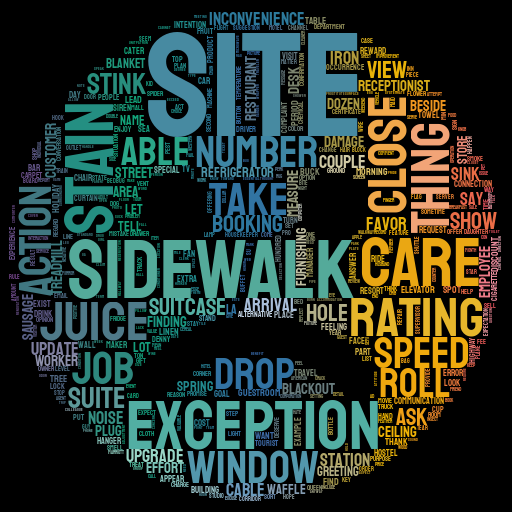

In [65]:
open_wordcloud('hotel_malos_comentarios.png')

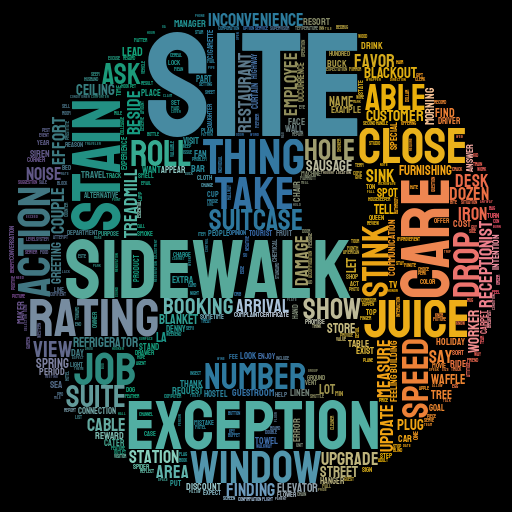

In [63]:
open_wordcloud('hotel_malos_comentarios.png')

## Lemmatization y Stemming

In [140]:
from nltk.stem import WordNetLemmatizer

In [141]:
lemmatizer = WordNetLemmatizer() 

In [142]:
lemmatizer.lemmatize('rocks')

'rock'

In [143]:
lemmatizer.lemmatize('grateful')

'grateful'

In [144]:
lemmatizer.lemmatize('heartbreak')

'heartbreak'

In [145]:
lemmatizer.lemmatize('programming')

'programming'

In [146]:
from nltk.stem import PorterStemmer

In [147]:
ps = PorterStemmer()

In [148]:
ps.stem('programming')

'program'

In [149]:
ps.stem('grateful')

'grate'

In [150]:
ps.stem('worst')

'worst'

In [151]:
ps.stem('heartbreaker')

'heartbreak'

In [152]:
lemmatizer.lemmatize('heartbreaker')

'heartbreaker'

In [153]:
from nltk.stem import SnowballStemmer

In [154]:
eng_stemmer = SnowballStemmer('english')

In [155]:
spanish_stemmer=SnowballStemmer('spanish')

In [156]:
spanish_stemmer.stem('panadero')

'panader'

In [157]:
spanish_stemmer.stem('corazonada')

'corazon'

In [158]:
spanish_stemmer.stem('corriendo')

'corr'

In [159]:
lemmatizer.lemmatize('loved','v')

'love'

In [160]:
lemmatizer.lemmatize('lovely','a')

'lovely'

In [161]:
eng_stemmer.stem('loved')

'love'

In [162]:
eng_stemmer.stem('running')

'run'

In [163]:
lemmatizer.lemmatize('running','v')

'run'

In [164]:
lemmatizer.lemmatize('ran','v')

'run'

In [165]:
eng_stemmer.stem('ran')

'ran'